<a href="https://colab.research.google.com/github/likedanger/Data_Study/blob/master/sigmoid%2Bk_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## sigmoid function

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))


z = np.arange(-7, 7, 0.1)
f_x = sigmoid(z)

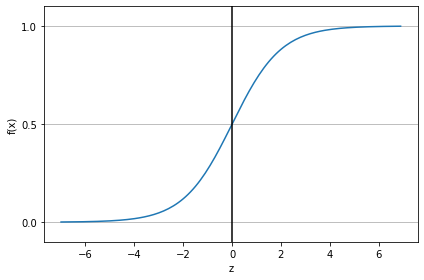

In [4]:
plt.plot(z, f_x)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('f(x)')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

## 군집분석 K 평균

In [0]:
from sklearn.datasets import make_blobs

In [0]:
X, y = make_blobs(n_samples=150, n_features=2, centers= 3, cluster_std=0.5, shuffle= True, random_state=0)

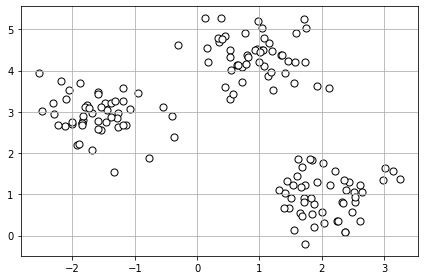

In [12]:
plt.scatter(X[:,0], X[:,1], c='white', marker= 'o', edgecolors='black', s= 50)
plt.grid()
plt.tight_layout()
plt.show()

In [0]:
from sklearn.cluster import KMeans

In [0]:
km = KMeans(n_clusters=3, init= 'random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
# n_clusters = 클러스터 개수
# init = 기본 k평균 설정
# n_init = 각기 랜덤한 샌트로이드에서 실행 횟수
# max_iter = 가장 가까운 샌트로이드에 할당 및 이동
# tol = 제곱 오차 변화량에 대한 허용 오차 값에 도달할 경우 일찍 종료

In [0]:
y_km = km.fit_predict(X)
# 군집 분석 알고리즘에 대한 예측 클레스 레이블

## K-means 알고리즘 시각화 코드

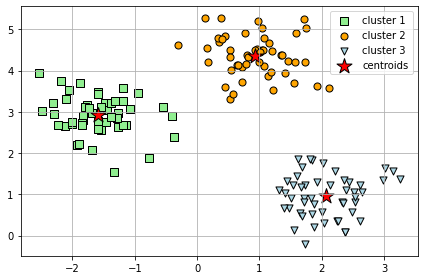

In [19]:
plt.scatter(X[y_km == 0,0], X[y_km == 0, 1], s =50, c='lightgreen', marker = 's', edgecolor = 'black', label = 'cluster 1')

plt.scatter(X[y_km == 1,0], X[y_km == 1, 1], s =50, c='orange', marker = 'o', edgecolor = 'black', label = 'cluster 2')

plt.scatter(X[y_km == 2,0], X[y_km == 2, 1], s =50, c='lightblue', marker = 'v', edgecolor = 'black', label = 'cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s= 250, marker = '*', c = 'red', edgecolors= 'black', label = 'centroids')

plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

## K-means ++

In [0]:
km = KMeans(n_clusters = 3, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=0)

## 관성 - inertia

In [40]:
print('왜곡: %.2f' % km.inertia_)

왜곡: 72.48


## Elbow Method

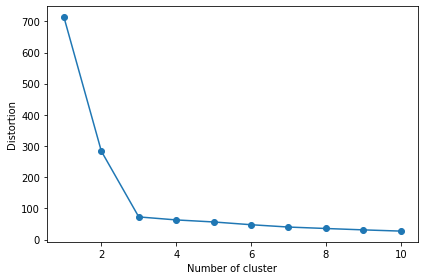

In [41]:
distortions=[]
for i in range(1, 11):
  km = KMeans(n_clusters= i , init='k-means++', n_init=10, max_iter=300, random_state=0)

  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Silhouette Analysis

In [0]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [0]:
km = KMeans(n_clusters= 3 , init='k-means++', n_init=10, max_iter=300, random_state=0)

y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

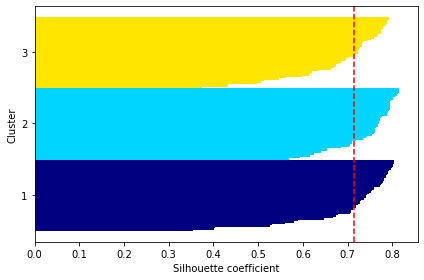

In [51]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i , c in enumerate(cluster_labels):
  c_silhoutte_vals = silhouette_vals[y_km == c]
  c_silhoutte_vals.sort()
  y_ax_upper += len(c_silhoutte_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhoutte_vals, height = 1.0, edgecolor ='none', color=color)

  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhoutte_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = "red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()